<a href="https://colab.research.google.com/github/chrisardo/Ejercicios-desarrollados-en-Sql-/blob/main/SESI%C3%93N_4_FUNCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

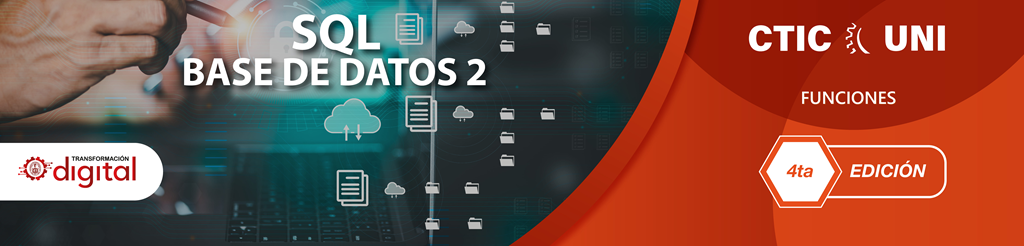

<table border=1 width='99%'>
<tr>
<td bgcolor='#AC2B24'>

# **<font color="#FFFFFF"> ¿Qué son las Funciones en SQL Server?</font>**
</td>
</tr>
</table>

Las funciones en SQL Server son bloques de código que se pueden reutilizar y que realizan una tarea específica.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Tipos de Funciones</font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Funciones Escalares </font>**
</td>
</tr>
</table>

Estas **devuelven un solo valor**< y pueden ser utilizadas en consultas SQL, como en las cláusulas SELECT, WHERE, ORDER BY, etc.

Un ejemplo de función escalar es LEN(), que devuelve la longitud de una cadena.

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Funciones de Tabla </font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Funciones con valores de tabla insertados</font>**
</td>
</tr>
</table>

Las funciones con valores de tabla insertados  en SQL Server son un tipo de función que permite devolver un conjunto de resultados como una tabla.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Funciones con valores de tabla de múltiples instrucciones</font>**
</td>
</tr>
</table>

Las funciones con valores de tabla de múltiples instrucciones en SQL Server son un tipo específico de función de tabla que permite ejecutar más de una instrucción SQL dentro de su definición.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Funciones Escalares</font>**
</td>
</tr>
</table>

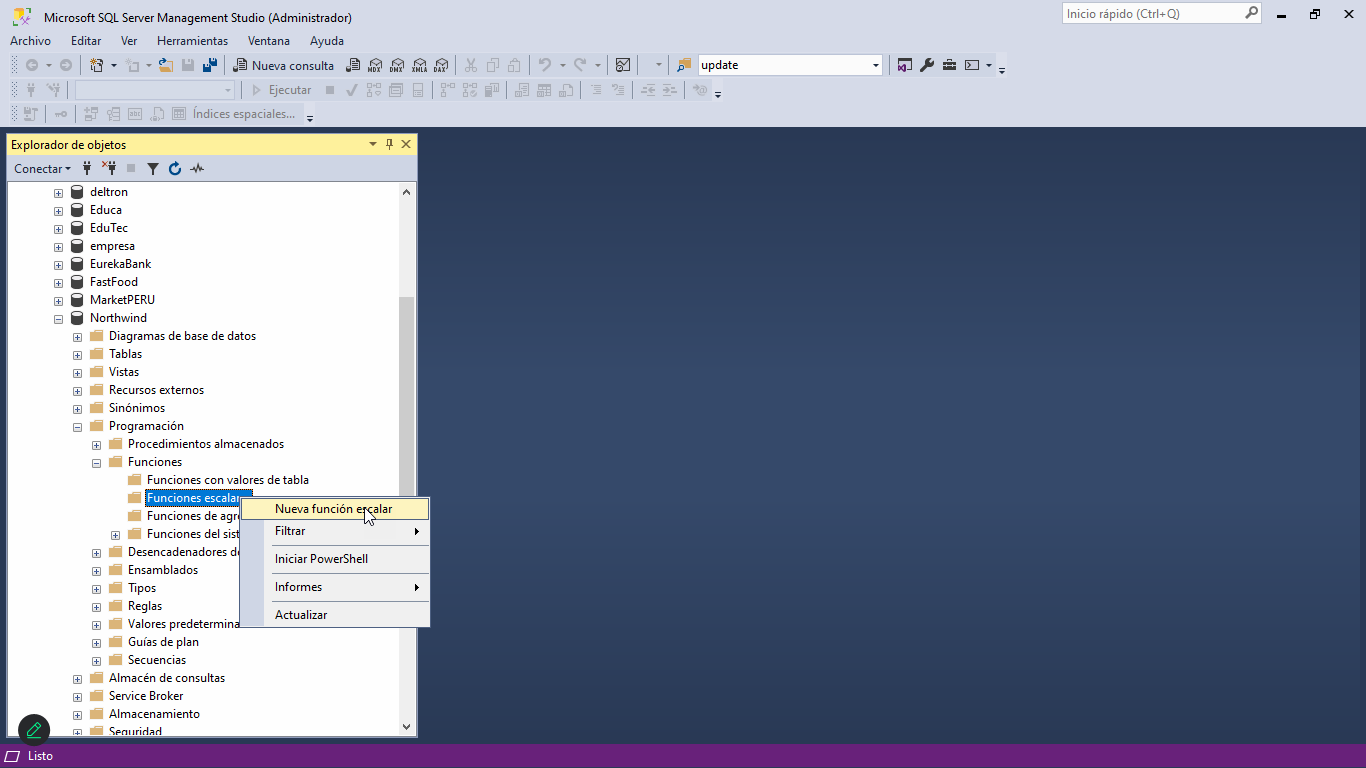

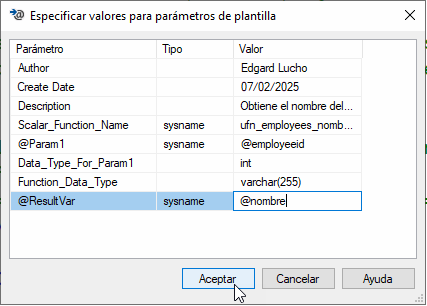



```
USE Northwind
GO
-- ================================================
-- Template generated from Template Explorer using:
-- Create Scalar Function (New Menu).SQL
--
-- Use the Specify Values for Template Parameters
-- command (Ctrl-Shift-M) to fill in the parameter
-- values below.
--
-- This block of comments will not be included in
-- the definition of the function.
-- ================================================
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
-- Author:		Edgard Lucho
-- Create date: 07/02/2025
-- Description:	Obtiene el nombre del empleado
-- en forma completa por el código del empleado
-- =============================================
CREATE OR ALTER FUNCTION ufn_employees_nombre_empleado
(
	-- Add the parameters for the function here
	@employeeid int
)
RETURNS nvarchar(45)
AS
BEGIN
	-- Declare the return variable here
	DECLARE @nombre nvarchar(45)

	-- Add the T-SQL statements to compute the return value here
	SELECT @nombre = CONCAT([TitleOfCourtesy], SPACE(1), [LastName], ', ', [FirstName])
	FROM Employees
	WHERE EmployeeID = @employeeid

	-- Return the result of the function
	RETURN @nombre

END
GO

SELECT dbo.ufn_employees_nombre_empleado(1) AS Empleado
GO

USE [Northwind]
GO

SELECT [OrderID]
      ,[CustomerID]
      ,[EmployeeID]
	  ,dbo.ufn_employees_nombre_empleado([EmployeeID]) AS Empleado
      ,[OrderDate]
      ,[RequiredDate]
      ,[ShippedDate]
      ,[ShipVia]
      ,[Freight]
      ,[ShipName]
      ,[ShipAddress]
      ,[ShipCity]
      ,[ShipRegion]
      ,[ShipPostalCode]
      ,[ShipCountry]
  FROM [dbo].[Orders]

GO



```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'FN'
		AND
			name = 'ufn_customers_companyName'
)
DROP FUNCTION ufn_customers_companyName
GO
CREATE FUNCTION ufn_customers_companyName
(
	@CustomerID nvarchar(5)
)
RETURNS nvarchar(40)
AS
BEGIN
	DECLARE @CompanyName nvarchar(40)

	SELECT @CompanyName=CompanyName
	FROM Customers
	WHERE CustomerID = @CustomerID
	RETURN @CompanyName
END
GO

SELECT [OrderID]
      ,dbo.ufn_customers_companyName([CustomerID]) AS Cliente
      ,dbo.ufn_employees_nombre_empleado([EmployeeID]) AS Empleado
      ,[OrderDate]
      ,[RequiredDate]
      ,[ShippedDate]
      ,[ShipVia]
      ,[Freight]
      ,[ShipName]
      ,[ShipAddress]
      ,[ShipCity]
      ,[ShipRegion]
      ,[ShipPostalCode]
      ,[ShipCountry]
  FROM [dbo].[Orders]
GO
```





```
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_shippers_companyname
(
	@ShipperID INT
)
RETURNS NVARCHAR(40)
AS
BEGIN
	DECLARE @CompanyName  NVARCHAR(40) =
	(
		SELECT CompanyName
		FROM [dbo].[Shippers]
		WHERE [ShipperID] = @ShipperID
	)
	RETURN @CompanyName
END
GO
SELECT [OrderID]
      ,[dbo].[ufn_customers_companyName]([CustomerID]) AS Cliente
      ,[dbo].[ufn_employees_nombre_empleado]([EmployeeID]) AS Empleado
      ,[OrderDate]
      ,[RequiredDate]
      ,[ShippedDate]
      ,[dbo].[ufn_shippers_companyname]([ShipVia]) AS Transporte
      ,[Freight]
      ,[ShipName]
      ,[ShipAddress]
      ,[ShipCity]
      ,[ShipRegion]
      ,[ShipPostalCode]
      ,[ShipCountry]
  FROM [dbo].[Orders]

GO
```





```
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_orders_cnt_dias_entrega
(
	@OrderID INT
)
RETURNS INT
AS
BEGIN
	DECLARE @cnt INT

	SET @cnt =
	(
		SELECT
			DATEDIFF
			(
				day,
				(SELECT [OrderDate] FROM Orders WHERE OrderID= @OrderID),
				(SELECT [ShippedDate] FROM Orders WHERE OrderID= @OrderID)
			)
	)
	RETURN @cnt;
END
GO
USE [Northwind]
GO

SELECT [OrderID]
      ,[dbo].[ufn_customers_companyName]([CustomerID]) AS Cliente
      ,[dbo].[ufn_employees_nombre_empleado]([EmployeeID]) AS Empleado
      ,[OrderDate]
      ,[RequiredDate]
      ,[ShippedDate]
	  , [dbo].[ufn_orders_cnt_dias_entrega]([OrderID]) AS [Días de entrega]
      ,[dbo].[ufn_shippers_companyname]([ShipVia]) AS Transportes
      ,[Freight]
      ,[ShipName]
      ,[ShipAddress]
      ,[ShipCity]
      ,[ShipRegion]
      ,[ShipPostalCode]
      ,[ShipCountry]
  FROM [dbo].[Orders]

GO
```



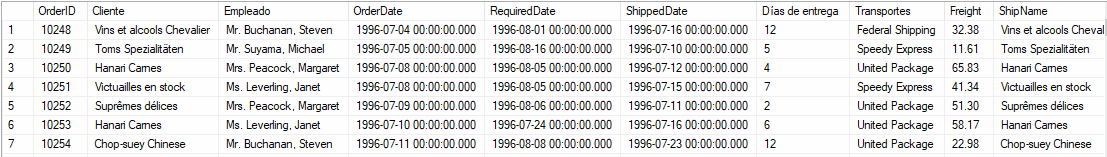



```
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_orders_cnt_dias_entrega
(
	@OrderID INT
)
RETURNS INT
AS
BEGIN
	RETURN
	(
		SELECT
			DATEDIFF
			(
				day,
				(SELECT [OrderDate] FROM Orders WHERE OrderID= @OrderID),
				(SELECT [ShippedDate] FROM Orders WHERE OrderID= @OrderID)
			)
	);
END
GO
SELECT [OrderID]
      ,[dbo].[ufn_customers_companyName]([CustomerID]) AS Cliente
      ,[dbo].[ufn_employees_nombre_empleado]([EmployeeID]) AS Empleado
      ,[OrderDate]
      ,[RequiredDate]
      ,[ShippedDate]
	  , [dbo].[ufn_orders_cnt_dias_entrega]([OrderID]) AS [Días de entrega]
      ,[dbo].[ufn_shippers_companyname]([ShipVia]) AS Transportes
      ,[Freight]
      ,[ShipName]
      ,[ShipAddress]
      ,[ShipCity]
      ,[ShipRegion]
      ,[ShipPostalCode]
      ,[ShipCountry]
  FROM [dbo].[Orders]

GO
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Calcular el total de ventas por cliente</font>**
</td>
</tr>
</table>



```
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_total_ventas_x_cliente
(
	@CustomerID nchar(5)
)
RETURNS MONEY
AS
BEGIN
	RETURN
	(
		SELECT SUM(od.Quantity * od.UnitPrice * ( 1 - od.Discount))
		FROM Customers c
		INNER JOIN Orders o
		ON c.CustomerID = o.CustomerID
		INNER JOIN [Order Details] od
		ON o.OrderID = od.OrderID
		WHERE c.CustomerID = @CustomerID
	);
END
GO
SELECT dbo.ufn_total_ventas_x_cliente('ANTON') AS Ventas
GO

SELECT [CustomerID]
      ,[CompanyName]
      ,[ContactName]
      ,[ContactTitle]
      ,[Address]
      ,[City]
      ,[Country]
	  ,dbo.ufn_total_ventas_x_cliente([CustomerID]) AS Ventas
  FROM [dbo].[Customers]

GO
```



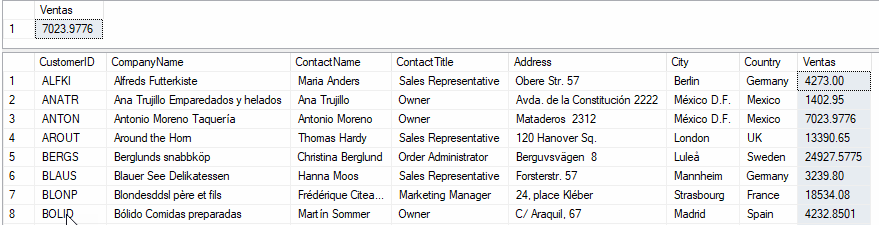

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Total de productos vendidos</font>**
</td>
</tr>
</table>

>* Calcular el total de productos vendidos si se conoce el número del mes y el año respectivamente



```
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_total_productos_vendidos_x_mes_y_year
(
	@mes INT,
	@yea INT
)
RETURNS INT
AS
BEGIN
	RETURN
	(
		SELECT SUM(Quantity)
		FROM Orders o
		INNER JOIN [Order Details] od
		ON o.OrderID = od.OrderID
		WHERE
				YEAR(o.OrderDate) = @yea
			AND
				MONTH(o.OrderDate) = @mes
	)
END
GO
SELECT dbo.ufn_total_productos_vendidos_x_mes_y_year(10, 1997) AS [Total de productos vendidos]
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Funciones con valores de tabla insertados</font>**
</td>
</tr>
</table>

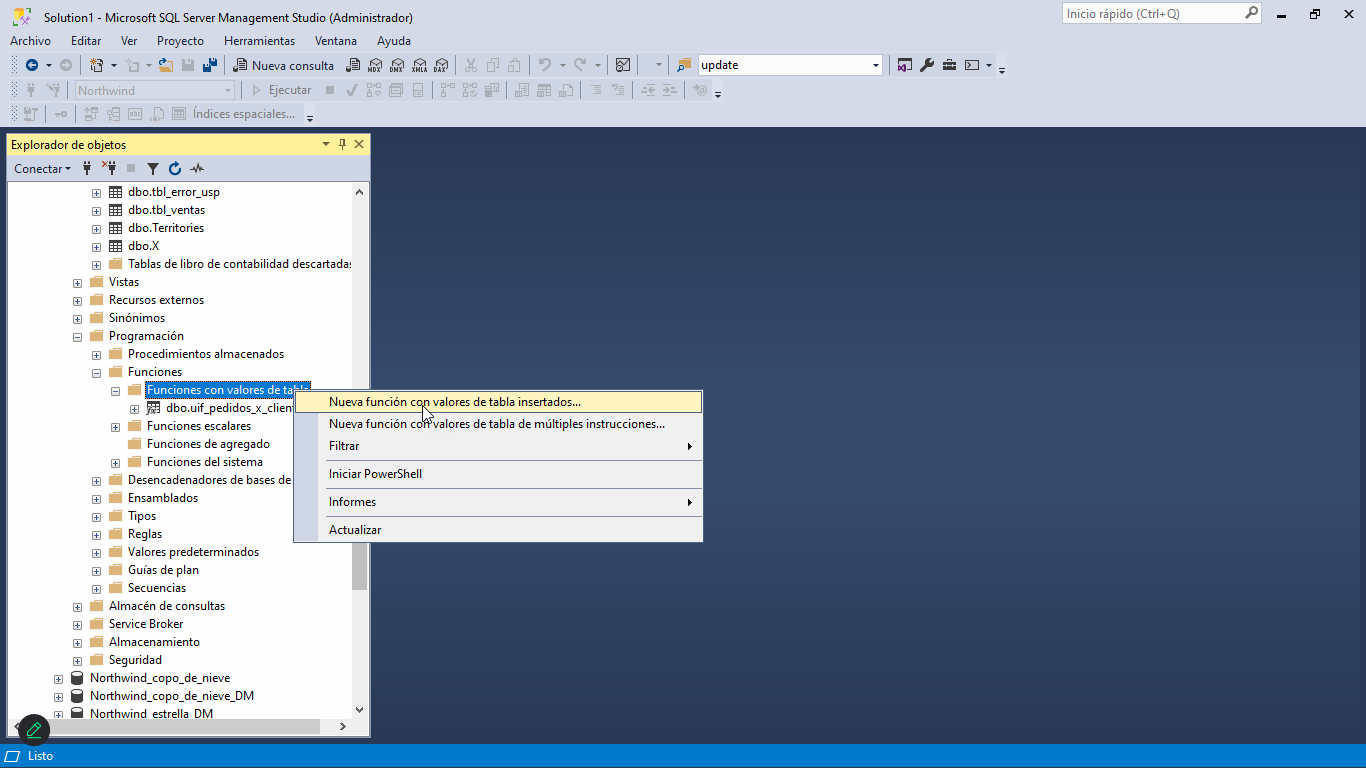



```
CREATE OR ALTER FUNCTION uif_pedidos_x_cliente
(
	@CustomerID NCHAR(5)
)
RETURNS TABLE
AS
RETURN
(
	SELECT
		[OrderID]
		,[dbo].[ufn_customers_companyName]([CustomerID]) AS Cliente
		,[dbo].[ufn_employees_nombre_empleado]([EmployeeID]) AS Empleado
		,[OrderDate]
		,[RequiredDate]
		,[ShippedDate]
		, [dbo].[ufn_orders_cnt_dias_entrega]([OrderID]) AS [Días de entrega]
		,[dbo].[ufn_shippers_companyname]([ShipVia]) AS Transportes
		,[Freight]
		,[ShipName]
		,[ShipAddress]
		,[ShipCity]
		,[ShipRegion]
		,[ShipPostalCode]
		,[ShipCountry]
	  FROM [dbo].[Orders]
	  WHERE CustomerID = @CustomerID
)
GO

SELECT * FROM dbo.uif_pedidos_x_cliente('ERNSH')
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Funciones con valores de tabla de múltiples instrucciones</font>**
</td>
</tr>
</table>

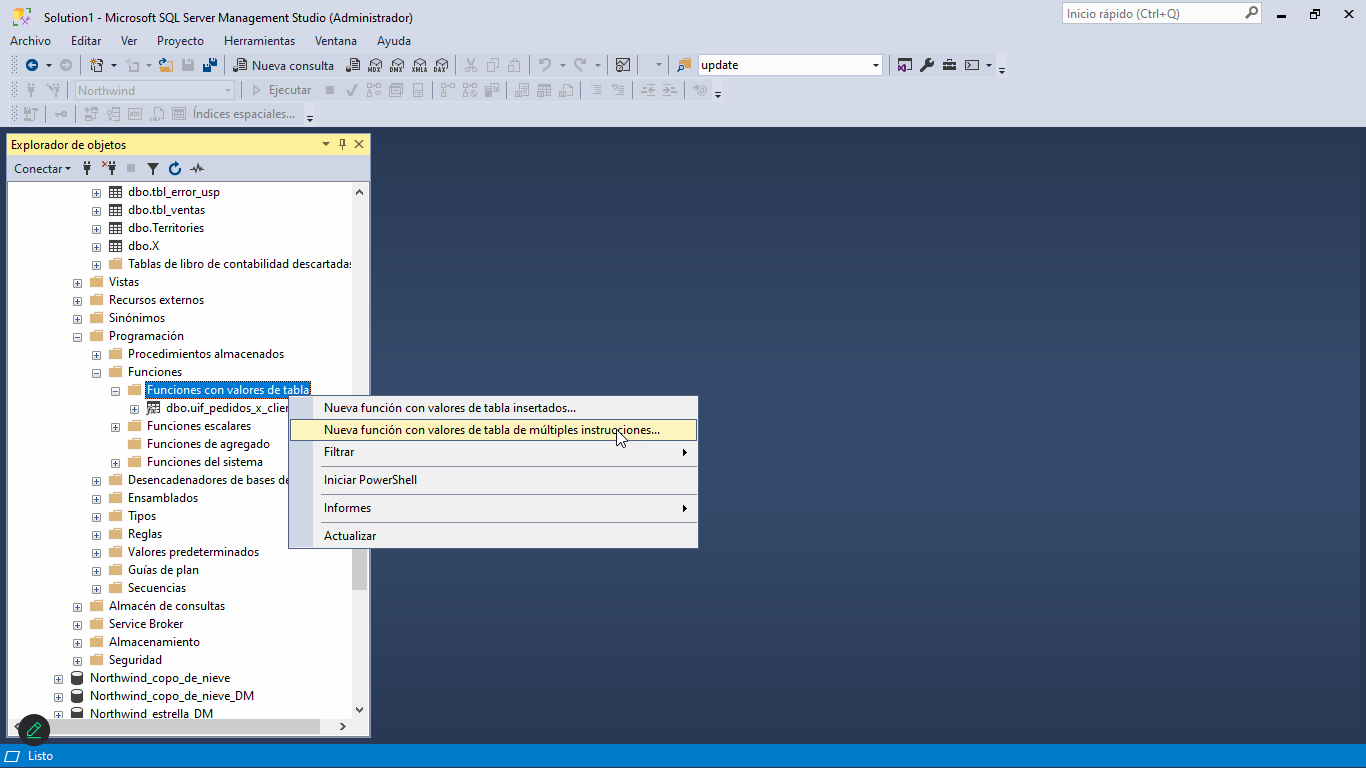



```
USE Northwind
GO
CREATE OR ALTER FUNCTION  utf_pedidos_x_cliente
(
	@CustomerID NCHAR(5)
)
RETURNS
@T TABLE
(
	[OrderID] [int] NOT NULL,
	[Cliente] [nvarchar](40) NULL,
	[Empleado] [nvarchar](45) NULL,
	[OrderDate] [datetime] NULL,
	[RequiredDate] [datetime] NULL,
	[ShippedDate] [datetime] NULL,
	[Días de entrega] [int] NULL,
	[Transportes] [nvarchar](40) NULL,
	[Freight] [money] NULL,
	[ShipName] [nvarchar](40) NULL,
	[ShipAddress] [nvarchar](60) NULL,
	[ShipCity] [nvarchar](15) NULL,
	[ShipRegion] [nvarchar](15) NULL,
	[ShipPostalCode] [nvarchar](10) NULL,
	[ShipCountry] [nvarchar](15) NULL
)
AS
BEGIN

	INSERT INTO @T
	SELECT
        [OrderID]
        ,[dbo].[ufn_customers_companyName]([CustomerID]) AS Cliente
        ,[dbo].[ufn_employees_nombre_empleado]([EmployeeID]) AS Empleado
        ,[OrderDate]
        ,[RequiredDate]
        ,[ShippedDate]
        , [dbo].[ufn_orders_cnt_dias_entrega]([OrderID]) AS [Días de entrega]
        ,[dbo].[ufn_shippers_companyname]([ShipVia]) AS Transportes
        ,[Freight]
        ,[ShipName]
        ,[ShipAddress]
        ,[ShipCity]
        ,[ShipRegion]
        ,[ShipPostalCode]
        ,[ShipCountry]
      FROM [dbo].[Orders]
      WHERE CustomerID = @CustomerID

	RETURN
END
GO
SELECT * FROM [dbo].[utf_pedidos_x_cliente]('ERNSH')
GO
```



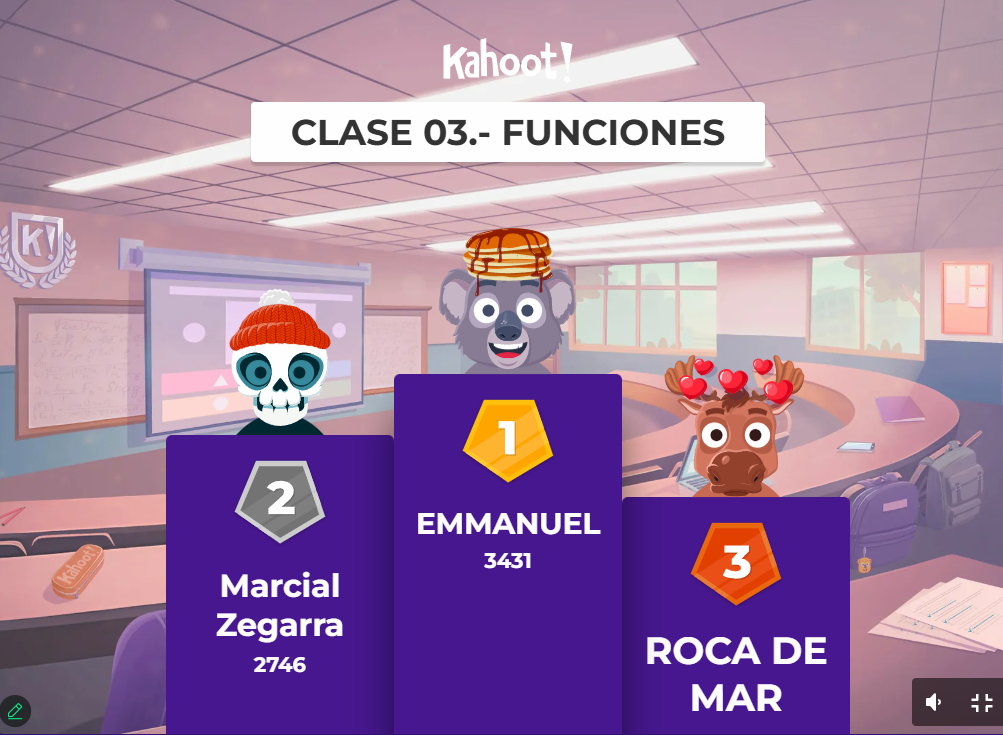

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Función Factorial Normal</font>**
</td>
</tr>
</table>



```
/*
Crear la función factorial
*/
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_factorial
(
	@n INT
)
RETURNS INT
AS
BEGIN
	DECLARE @cnt INT = 1;
	DECLARE @f INT = 1;
	WHILE @cnt <= @n
	BEGIN
		SET @f *= @cnt;
		SET @cnt += 1;
	END

	RETURN @f
END
GO
SELECT dbo.ufn_factorial(0) AS Factorial
GO
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Función Factorial Recursiva</font>**
</td>
</tr>
</table>

Una función recursiva es una función que se llama a sí misma dentro de su propia definición.

Este tipo de funciones son útiles para resolver problemas que pueden descomponerse en subproblemas más pequeños y similares al problema original.

La recursividad es un concepto fundamental en programación y matemáticas, y permite escribir soluciones elegantes y compactas para ciertos tipos de problemas.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Elementos Clave de una Función Recursiva</font>**
</td>
</tr>
</table>

>* **Caso Base**: Es la condición que detiene la recursión. Sin un caso base adecuado, la función seguiría llamándose indefinidamente, lo que provocaría un desbordamiento de pila (stack overflow).
>* **Caso Recursivo**: Es la parte de la función donde se realiza la llamada recursiva, es decir, donde la función se llama a sí misma con un subproblema más pequeño.
>* **Descomposición del Problema**: Cada llamada recursiva debe reducir el tamaño del problema hasta que eventualmente alcance el caso base.



```
/*
Crear la función factorial utilizando recursividad

N! = N * (N-1)!

*/
USE Northwind
GO
CREATE OR ALTER FUNCTION ufn_factorial
(
	@n INT
)
RETURNS INT
AS
BEGIN
	IF @n <= 1 RETURN 1
	RETURN @n * dbo.ufn_factorial(@n-1)
END
GO
DECLARE @i INT = 0;
WHILE @i <= 10
BEGIN
	PRINT CONCAT(RIGHT('   ' + LTRIM(@i), 3), '! = ', dbo.ufn_factorial(@i))
	SET @i+=1;
END
GO
```





```
CREATE OR ALTER FUNCTION dbo.Factorial
(
    @n INT
)
RETURNS INT
AS
BEGIN
    RETURN IIF(@n = 0, 1, @n * dbo.Factorial(@n - 1));
END
GO

DECLARE @i INT = 0;
WHILE @i <= 10
BEGIN
    PRINT CONCAT(RIGHT('   ' + LTRIM(@i), 3), '! = ', dbo.ufn_factorial(@i))
    SET @i+=1;
END
GO
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Función Suma Dinámica</font>**
</td>
</tr>
</table>



```
USE Northwind
GO
CREATE OR ALTER Function Suma
(
	@lista		VARCHAR(8000)
)
RETURNS INT
AS
BEGIN
	DECLARE @numero INT
	DECLARE @s INT = 0
	DECLARE @pos INT = CHARINDEX(',', @lista)

	IF @pos>0
	BEGIN
		SET @numero = CAST(SUBSTRING(@lista, 1,  CHARINDEX(',', @lista)-1) AS INT);
		SET @s += @numero
	END
	ELSE
	BEGIN
		SET @numero = CAST(@lista AS INT)
		SET @s += @numero
		RETURN @s;
	END

	SET @lista = SUBSTRING(@lista, CHARINDEX(',', @lista) + 1, LEN(@lista))
	RETURN @s + dbo.Suma(@lista)

END
GO
SELECT dbo.Suma('')
SELECT dbo.Suma('0')
SELECT dbo.Suma('1,2,3')
```





```
CREATE OR ALTER FUNCTION dbo.Suma
(
    @lista VARCHAR(8000)
)
RETURNS INT
AS
BEGIN
    RETURN IIF(@lista = '', 0,
               IIF(CHARINDEX(',', @lista) > 0,
                   CAST(SUBSTRING(@lista, 1, CHARINDEX(',', @lista) - 1) AS INT) + dbo.Suma(SUBSTRING(@lista, CHARINDEX(',', @lista) + 1, LEN(@lista))),
                   CAST(@lista AS INT)));
END
GO

-- Ejemplo de uso:
SELECT dbo.Suma('0,1,2,3');  -- Resultado: 6
SELECT dbo.Suma('');         -- Resultado: 0
```

